# EDA

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.shape

(1338, 7)

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Select the Numerical data 

In [9]:
numerical_data = data.select_dtypes(include="number")
numerical_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [10]:
numerical_data["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# Detect the outliers

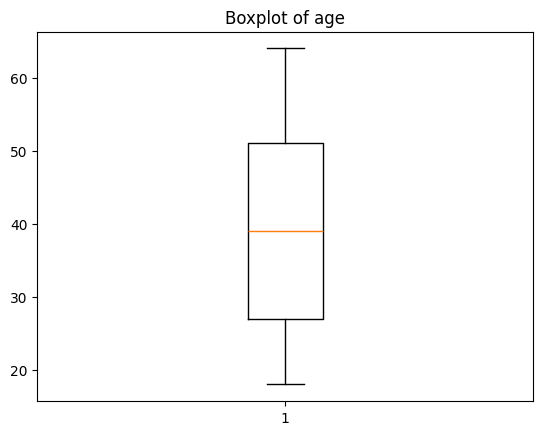

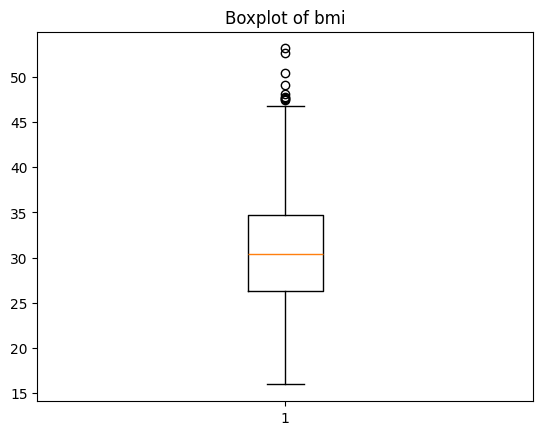

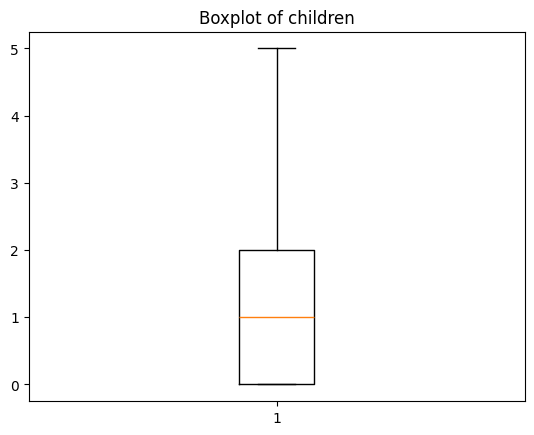

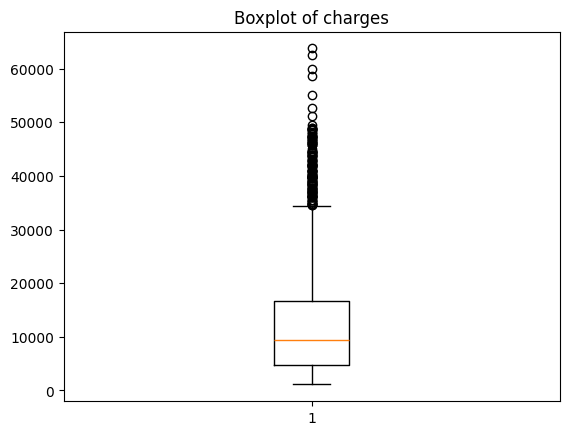

In [11]:
for col in numerical_data :
    plt.figure()
    plt.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
for col in numerical_data.columns:

    Q1 = numerical_data[col].quantile(0.25)
    Q3 = numerical_data[col].quantile(0.75)
    IQR = Q3 - Q1 

    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR

    outliers = numerical_data[(numerical_data[col] < lower_whisker) | (numerical_data[col] > upper_whisker) ][col]
    print(f"Outliers in '{col}':")
    if not outliers.empty:
        print(outliers)
    else :
        print('No outliers found')
    
    print("-" * 40)

Outliers in 'age':
No outliers found
----------------------------------------
Outliers in 'bmi':
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64
----------------------------------------
Outliers in 'children':
No outliers found
----------------------------------------
Outliers in 'charges':
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64
----------------------------------------


## Handling Outliers in the bmi column

In [13]:
# Calculate Q1, Q3, and IQR for all columns at once
Q1_bmi = numerical_data["bmi"].quantile(0.25)
Q3_bmi = numerical_data["bmi"].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Calculate the lower and upper bounds for all columns
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Create a mask for outliers (boolean DataFrame)
bmi_outliers_mask = (numerical_data["bmi"] < lower_bound_bmi) | (numerical_data["bmi"] > upper_bound_bmi)


# Filter rows containing outliers
filtered_bmi_outliers = numerical_data[bmi_outliers_mask]
filtered_bmi_outliers




,age,bmi,children,charges
116,58,49.06,0,11381.32540
286,46,48.07,2,9432.92530
401,47,47.52,1,8083.91980
543,54,47.41,0,63770.42801
847,23,50.38,1,2438.05520
860,37,47.60,2,46113.51100
1047,22,52.58,1,44501.39820
1088,52,47.74,1,9748.91060
1317,18,53.13,0,1163.46270


outliers in the charges column 

In [14]:
bmi_outliers_mask

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool

In [15]:
# Step 1: Calculate Q1, Q3, and IQR for the 'charges' column
Q1_charges = numerical_data['charges'].quantile(0.25)
Q3_charges = numerical_data['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges

# Step 2: Calculate the lower and upper bounds for the 'charges' column
lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

# Step 3: Create a boolean mask for outliers in the 'charges' column
charges_outliers_mask = (numerical_data['charges'] < lower_bound_charges) | (numerical_data['charges'] > upper_bound_charges)

filtered_charges_outliers=numerical_data[charges_outliers_mask]
filtered_bmi_outliers



,age,bmi,children,charges
116,58,49.06,0,11381.32540
286,46,48.07,2,9432.92530
401,47,47.52,1,8083.91980
543,54,47.41,0,63770.42801
847,23,50.38,1,2438.05520
860,37,47.60,2,46113.51100
1047,22,52.58,1,44501.39820
1088,52,47.74,1,9748.91060
1317,18,53.13,0,1163.46270


In [16]:
# Step 4: Check if rows in 'bmi' outliers are the same as 'charges' outliers
matching_outliers = filtered_bmi_outliers.index.isin(filtered_charges_outliers.index)
matching_outliers


array([False, False, False,  True, False,  True,  True, False, False])

In [17]:
corr = numerical_data["bmi"].corr(numerical_data["charges"])
corr #with a correlation of 0.20, the relationship between bmi and charges is weak,
#indicating that bmi has little linear influence on charges.

np.float64(0.1983409688336289)

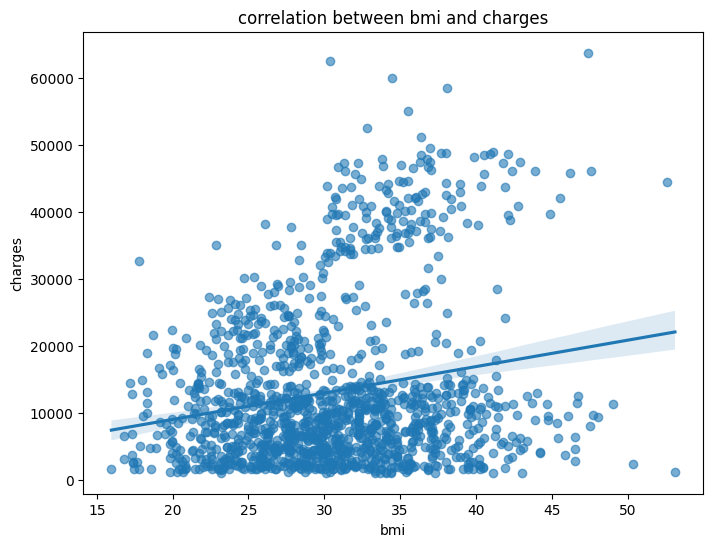

In [18]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.regplot(x="bmi",y="charges",data=numerical_data,scatter_kws={"alpha":0.6})
plt.title("correlation between bmi and charges")
plt.show()

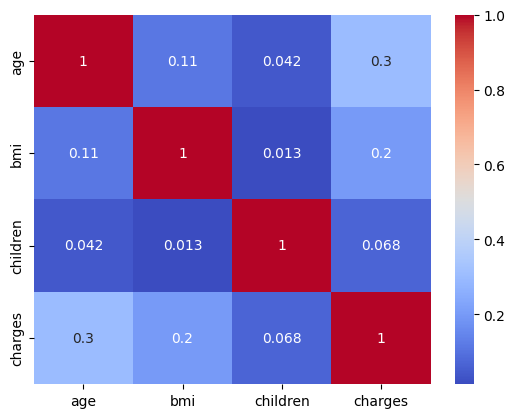

In [19]:
sns.heatmap(numerical_data.corr(),annot=True,cmap="coolwarm")
plt.show()

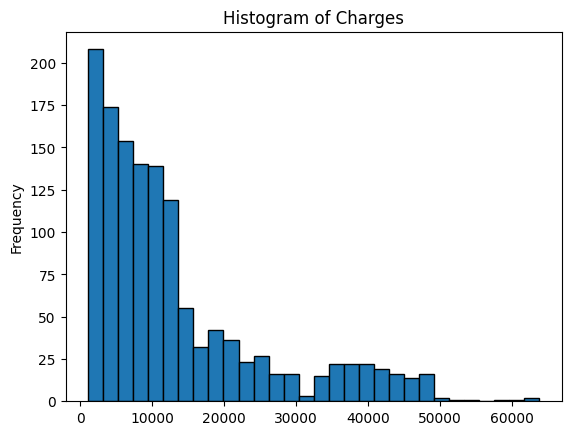

In [20]:
numerical_data["charges"].plot(kind="hist",bins=30,edgecolor="black")
plt.title("Histogram of Charges")
plt.show()

C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_6176\1703048690.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_data["charges"], shade=True)


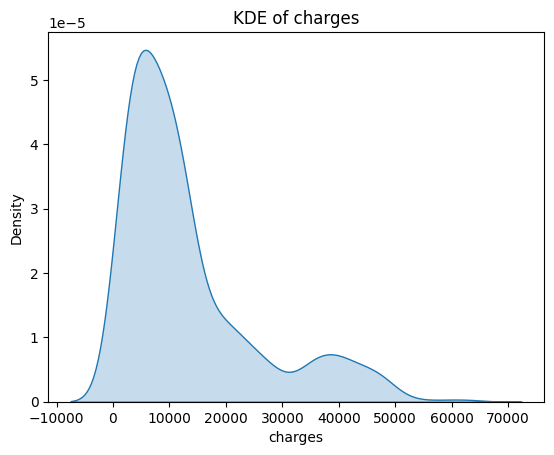

In [21]:

sns.kdeplot(numerical_data["charges"], shade=True)
plt.title('KDE of charges')
plt.show()


C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_6176\1429730634.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_data["bmi"], shade=True)


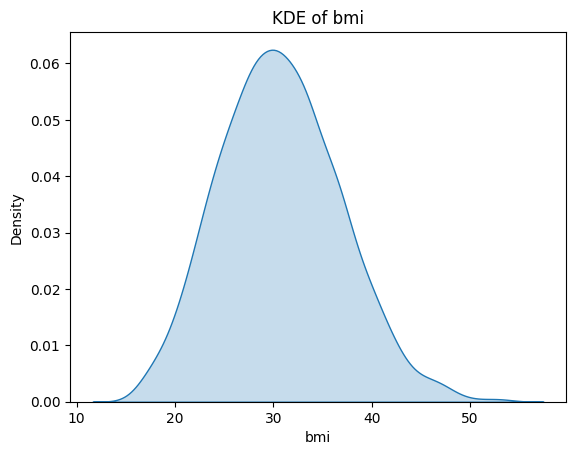

In [22]:

sns.kdeplot(numerical_data["bmi"], shade=True)
plt.title('KDE of bmi')
plt.show()


C:\Users\Eng_Tamer\AppData\Local\Temp\ipykernel_6176\2019322456.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_data["age"], shade=True)


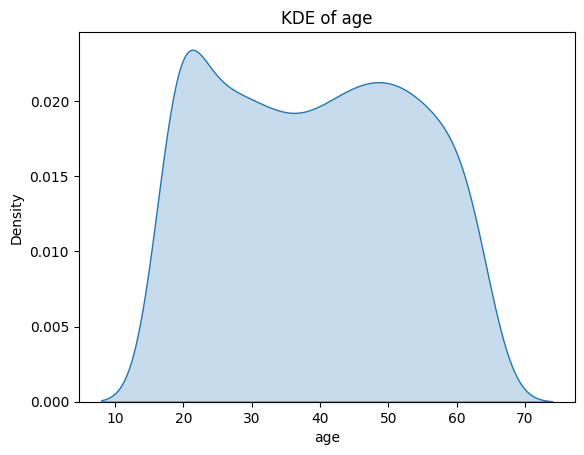

In [23]:

sns.kdeplot(numerical_data["age"], shade=True)
plt.title('KDE of age')
plt.show()


## Remove the outliers in the bmi 

In [24]:
filtered_bmi_outliers[~matching_outliers].index

Index([116, 286, 401, 847, 1088, 1317], dtype='int64')

In [25]:
mismatching_outliers_bmi = filtered_bmi_outliers[~matching_outliers]
mismatching_outliers_bmi

,age,bmi,children,charges
116,58,49.06,0,11381.3254
286,46,48.07,2,9432.9253
401,47,47.52,1,8083.9198
847,23,50.38,1,2438.0552
1088,52,47.74,1,9748.9106
1317,18,53.13,0,1163.4627


In [26]:
numerical_data_cleaned = numerical_data.drop(mismatching_outliers_bmi.index)

In [27]:
numerical_data.shape

(1338, 4)

In [28]:
numerical_data_cleaned.shape

(1332, 4)

In [29]:
data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [30]:
data[["bmi","charges"]]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [31]:
print(f"outliers in '{col}':")

outliers in 'charges':


In [32]:
categorical_data = data.select_dtypes(include=["object","category"])

In [33]:
data.select_dtypes(include=["object","category"])

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [34]:
categorical_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


# Drop the region column 

In [35]:
categorical_data.drop("region",inplace = True,axis=1)

In [36]:
categorical_data.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [37]:
categorical_data_cleaned = categorical_data.drop(mismatching_outliers_bmi.index)

In [38]:
categorical_data_cleaned.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [39]:
numerical_data_cleaned.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [40]:
categorical_data_cleaned.shape

(1332, 2)

In [41]:
numerical_data_cleaned.shape

(1332, 4)

In [42]:
combined_data_cleaned=pd.concat([numerical_data_cleaned,categorical_data_cleaned],axis=1)

In [43]:
combined_data_cleaned.head()

,age,bmi,children,charges,sex,smoker
0,19,27.900,0,16884.92400,female,yes
1,18,33.770,1,1725.55230,male,no
2,28,33.000,3,4449.46200,male,no
3,33,22.705,0,21984.47061,male,no
4,32,28.880,0,3866.85520,male,no


## split the data

In [44]:
X = combined_data_cleaned.drop("charges",axis=1)
y = combined_data_cleaned["charges"]

In [45]:
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1065, 5), (267, 5), (1065,), (267,))

# Apply Encoding 

In [47]:
combined_data_cleaned.dtypes

age           int64
bmi         float64
children      int64
charges     float64
sex          object
smoker       object
dtype: object

for sex column 

In [48]:
X_train.head()

,age,bmi,children,sex,smoker
1284,61,36.300,1,male,yes
588,61,35.910,0,female,no
968,21,25.745,2,male,no
423,25,30.590,0,male,no
171,49,30.300,0,male,no


In [49]:
X_test.head()

,age,bmi,children,sex,smoker
1285,47,24.32,0,female,no
1065,42,25.30,1,female,no
1255,42,37.90,0,female,no
300,36,27.55,3,male,no
238,19,29.07,0,male,yes


In [50]:
X_train["sex"].unique()

array(['male', 'female'], dtype=object)

In [51]:
X_test["sex"].unique()

array(['female', 'male'], dtype=object)

Mapping the Sex column 

In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_train["sex"] = encoder.fit_transform(X_train["sex"])




In [53]:
X_train.head()

,age,bmi,children,sex,smoker
1284,61,36.300,1,1,yes
588,61,35.910,0,0,no
968,21,25.745,2,1,no
423,25,30.590,0,1,no
171,49,30.300,0,1,no


In [54]:
X_test["sex"] = encoder.transform(X_test["sex"])

In [55]:
X_test.head()

,age,bmi,children,sex,smoker
1285,47,24.32,0,0,no
1065,42,25.30,1,0,no
1255,42,37.90,0,0,no
300,36,27.55,3,1,no
238,19,29.07,0,1,yes


In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 1285 to 561
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       267 non-null    int64  
 1   bmi       267 non-null    float64
 2   children  267 non-null    int64  
 3   sex       267 non-null    int64  
 4   smoker    267 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 12.5+ KB


## for smoker column 

In [57]:
X_train["smoker"].unique()

array(['yes', 'no'], dtype=object)

Apply mapping on smoker column

In [58]:
smoker_dict = {"yes":1,"no":0}
X_train["smoker"]=X_train["smoker"].map(smoker_dict)
X_train["smoker"]

1284    1
588     0
968     0
423     0
171     0
       ..
1100    1
1135    0
1299    0
864     0
1131    0
Name: smoker, Length: 1065, dtype: int64

In [59]:
X_train["smoker"].unique()

array([1, 0])

In [60]:
X_test["smoker"]=X_test["smoker"].map(smoker_dict)
X_test["smoker"]

1285    0
1065    0
1255    0
300     0
238     1
       ..
805     0
557     0
1196    1
914     0
561     0
Name: smoker, Length: 267, dtype: int64

In [61]:
X_train["smoker"].unique()

array([1, 0])

In [62]:
X_train.index

Index([1284,  588,  968,  423,  171,  276,  796,  210,  344,  141,
       ...
        332, 1243,  469,  122, 1048, 1100, 1135, 1299,  864, 1131],
      dtype='int64', length=1065)

In [63]:
X_test.index

Index([1285, 1065, 1255,  300,  238,  591,  241,  278,  891,  707,
       ...
        708,   54,  433,  841,  109,  805,  557, 1196,  914,  561],
      dtype='int64', length=267)

## Reset the index of the x_train and x_test

In [64]:
X_train_reset = X_train.reset_index(drop=True)

In [65]:
X_train_reset

,age,bmi,children,sex,smoker
0,61,36.300,1,1,1
1,61,35.910,0,0,0
2,21,25.745,2,1,0
3,25,30.590,0,1,0
4,49,30.300,0,1,0
...,...,...,...,...,...
1060,33,19.095,2,0,1
1061,50,28.120,3,0,0
1062,19,25.745,1,0,0
1063,51,25.400,0,1,0


In [66]:
X_test.index

Index([1285, 1065, 1255,  300,  238,  591,  241,  278,  891,  707,
       ...
        708,   54,  433,  841,  109,  805,  557, 1196,  914,  561],
      dtype='int64', length=267)

In [67]:
X_test_reset = X_test.reset_index(drop=True)

In [68]:
X_test_reset.index

RangeIndex(start=0, stop=267, step=1)

# scaling the X_train and X_test after concatinating


considering my data is sparse so I will use Max Abs Scaler

In [69]:
from sklearn.preprocessing import MaxAbsScaler

In [70]:
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_reset)
X_test_scaled = scaler.transform(X_test_reset)

In [71]:
print(X_train_scaled)

[[0.953125   0.69037657 0.2        1.         1.        ]
 [0.953125   0.6829593  0.         0.         0.        ]
 [0.328125   0.48963484 0.4        1.         0.        ]
 ...
 [0.296875   0.48963484 0.2        0.         0.        ]
 [0.796875   0.48307341 0.         1.         0.        ]
 [0.421875   0.8729555  0.4        1.         0.        ]]


In [72]:
print(X_test_scaled)

[[0.734375   0.46253328 0.         0.         0.        ]
 [0.65625    0.48117155 0.2        0.         0.        ]
 [0.65625    0.72080639 0.         0.         0.        ]
 ...
 [0.296875   0.57093952 0.         0.         1.        ]
 [0.515625   0.46795359 0.4        1.         0.        ]
 [0.84375    0.6215291  0.         0.         0.        ]]


# convert the numpy array to DataFrame

In [73]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [74]:
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [75]:
X_train_scaled_df.head()

,age,bmi,children,sex,smoker
1284,0.953125,0.690377,0.2,1.0,1.0
588,0.953125,0.682959,0.0,0.0,0.0
968,0.328125,0.489635,0.4,1.0,0.0
423,0.390625,0.581780,0.0,1.0,0.0
171,0.765625,0.576265,0.0,1.0,0.0


In [76]:
X_test_scaled_df.head()

,age,bmi,children,sex,smoker
1285,0.734375,0.462533,0.0,0.0,0.0
1065,0.656250,0.481172,0.2,0.0,0.0
1255,0.656250,0.720806,0.0,0.0,0.0
300,0.562500,0.523963,0.6,1.0,0.0
238,0.296875,0.552872,0.0,1.0,1.0


## SEE The correlation between the region and the target column charges

In [77]:
correlation_matrix_train = X_train_scaled_df.join(y_train)


In [78]:
correlation_matrix_train.head()

,age,bmi,children,sex,smoker,charges
1284,0.953125,0.690377,0.2,1.0,1.0,47403.88000
588,0.953125,0.682959,0.0,0.0,0.0,13635.63790
968,0.328125,0.489635,0.4,1.0,0.0,3279.86855
423,0.390625,0.581780,0.0,1.0,0.0,2727.39510
171,0.765625,0.576265,0.0,1.0,0.0,8116.68000


In [79]:
y_train.dtypes

dtype('float64')

In [80]:
X_train_scaled_df.shape

(1065, 5)

In [99]:
# Ensure 'charges' is correctly added
X_y_train = X_train_scaled_df.copy()
X_y_train["charges"] = y_train  # Adding the target column 'charges' to the dataframe

# Compute correlation matrix for the features and target
correlation_matrix_train = X_y_train.corr()
correlation_matrix_train

,age,bmi,children,sex,smoker,charges
age,1.000000,0.108022,0.056151,-0.027469,-0.021799,0.298677
bmi,0.108022,1.000000,0.011670,0.026605,0.025287,0.217426
children,0.056151,0.011670,1.000000,0.011502,0.007971,0.080162
sex,-0.027469,0.026605,0.011502,1.000000,0.084169,0.065733
smoker,-0.021799,0.025287,0.007971,0.084169,1.000000,0.795921
charges,0.298677,0.217426,0.080162,0.065733,0.795921,1.000000


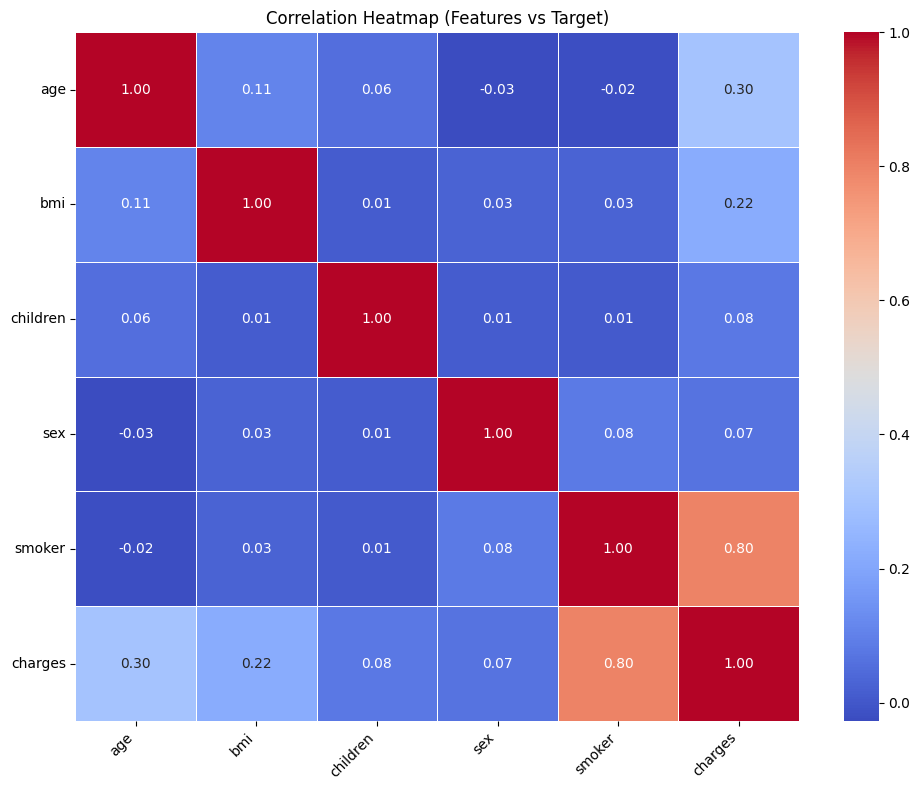

In [82]:

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.yticks(rotation=0)
plt.title("Correlation Heatmap (Features vs Target)")
plt.tight_layout()
plt.show()


## Training the model 

Use Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
RF_model = RandomForestRegressor(n_estimators=200,random_state=42,n_jobs=-1,criterion="friedman_mse",max_depth=4)
RF_model.fit(X_train_scaled,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [102]:
y_pred_RF_model = RF_model.predict(X_test_scaled_df)

c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [86]:
y_pred_RF_model

array([10334.86934912,  7267.97784136,  7109.54719744,  6793.12336346,
       20180.69909767, 10343.02348304,  6363.72901706, 15414.25320349,
        8403.45268467, 11295.09243488,  7244.48764529, 12273.58430973,
        4948.41182851, 15604.21458067,  3170.08020935, 23430.5902227 ,
        9012.07437368, 41022.09151914, 15390.29286992,  5287.81073363,
       12764.58920979, 19300.18128203, 10583.25065545,  3988.84699349,
       27341.19189085,  5982.59773096, 15570.53631941, 11397.23014613,
        7649.20947293, 40748.82534438,  6257.37148379,  7247.59463543,
        8057.03901147,  7457.75314285, 24495.42126757,  3124.86014857,
        6904.2867242 ,  6410.0140392 ,  8773.51286678, 12681.56908367,
        3154.00677146,  4011.9604726 , 36486.71077337,  4426.89752069,
       46329.30209329, 11823.30989829,  3051.97201883,  4025.21984582,
        5287.81073363,  7430.09029021,  6168.04261425, 17603.3686146 ,
       24112.17790445, 44128.36973512, 17229.12656837, 42268.52356677,
      

Get the feature importance using Random forest 

In [87]:
importance = RF_model.feature_importances_
importance

array([1.13950697e-01, 1.62332257e-01, 9.43306700e-03, 3.53148399e-04,
       7.13930831e-01])

In [88]:
feature_names = X_train_scaled_df.columns
feature_names

Index(['age', 'bmi', 'children', 'sex', 'smoker'], dtype='object')

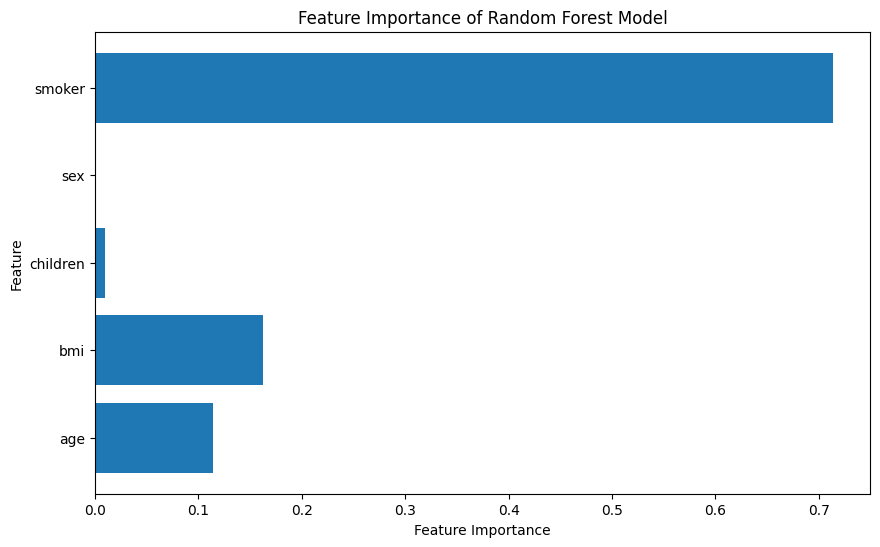

In [89]:
plt.figure(figsize=(10,6))
plt.barh(feature_names,importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Random Forest Model")
plt.show()

## Evaluation of Random forest model

In [90]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_RF_model)

np.float64(2753.1265230265644)

In [91]:
r2_score(y_test,y_pred_RF_model)
# 0.786961109588771

0.826163640880629

# Use grid search 

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
parameter = {"n_estimators":[150,200],
             "criterion":["friedman_mse","absolute_error"],
             "max_depth":[3,2,4]
}

In [94]:
grid=GridSearchCV(RF_model,parameter)

In [95]:
grid.fit(X_train_scaled_df,y_train)

c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestRegressor(criterion='friedman_mse',
                                             max_depth=4, n_estimators=200,
                                             n_jobs=-1, random_state=42),
             param_grid={'criterion': ['friedman_mse', 'absolute_error'],
                         'max_depth': [3, 2, 4], 'n_estimators': [150, 200]})

In [96]:
grid.best_score_
# 0.8548335222459563
# 0.870591416250482

np.float64(0.8707989728069089)

In [97]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 200}

In [98]:
grid.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=200,
                      n_jobs=-1, random_state=42)